In [ ]:
install.packages("bnlearn")
library(bnlearn)

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(c("graph", "RBGL", "Rgraphviz"))
library(Rgraphviz)
install.packages("gRain", dependencies=TRUE)
library(gRain)
install.packages("useful")
library(useful)

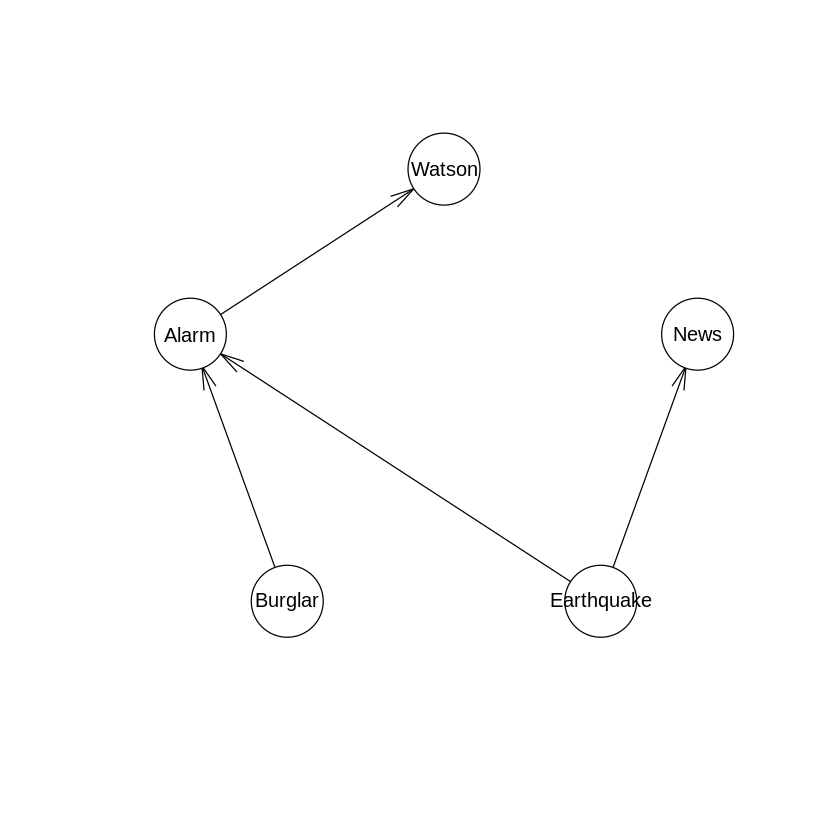

In [4]:
# 1. 
bl.alarm <- model2network('[Burglar][Earthquake][Alarm|Burglar:Earthquake][News|Earthquake][Watson|Alarm]')
plot(bl.alarm)

yn <- c("yes","no")
B <- array(dimnames = list(Burglar = yn), dim = 2, c(0.30,0.70))
E <- array(dimnames = list(Earthquake = yn), dim = 2, c(0.35,0.65))
A <- array(dimnames = list(Alarm = yn, Earthquake = yn, Burglar = yn), 
           dim = c(2, 2, 2),
           c(0.95,0.05,0.90,0.10,0.60,0.40,0.01,0.99))
W <- array(dimnames = list(Watson = yn, Alarm = yn), 
           dim = c(2, 2), c(0.80,0.20,0.40,0.60))
N <- array(dimnames = list(News = yn, Earthquake = yn), 
           dim = c(2, 2), c(0.60,0.40,0.01,0.99))
cpts <- list(Burglar = B, Earthquake = E, Alarm = A, Watson = W, News = N)
bl.alarm.fit = custom.fit(bl.alarm, cpts)

In [5]:
gr.alarm <- as.grain(bl.alarm.fit)
gr.alarm <- compile(gr.alarm)

In [6]:
nodes <- c('Burglar', 'Earthquake', 'Alarm', 'Watson', 'News') 
gr.alarm <- retractEvidence(gr.alarm, nodes) 

In [7]:
# 1. a)
gr.alarm.News <- setEvidence(object=gr.alarm, nodes = "News", states = "yes")
# i
querygrain(gr.alarm.News, nodes = "Earthquake", type = "joint")[1] > querygrain(object=gr.alarm, nodes="Earthquake", type = "joint")[1]
# ii
querygrain(gr.alarm.News, nodes = "Burglar", type = "joint")[1] > querygrain(object=gr.alarm, nodes="Burglar", type = "joint")[1]


yes 
TRUE

yes 
FALSE

In [8]:
# 1. b)
gr.alarm.Earthquake <- setEvidence(object=gr.alarm, nodes = "Earthquake", states = "yes")
# i
querygrain(gr.alarm.Earthquake, nodes = "Watson", type = "joint")[1] > querygrain(object=gr.alarm, nodes="Watson", type = "joint")[1]
# ii
querygrain(gr.alarm.Earthquake, nodes = "Burglar", type = "joint")[1] > querygrain(object=gr.alarm, nodes="Burglar", type = "joint")[1]

yes 
TRUE

yes 
FALSE

In [9]:
# 1. c)
gr.alarm.Alarm <- setEvidence(object=gr.alarm, nodes = "Alarm", states = "yes")
# i
querygrain(gr.alarm.Alarm, nodes = "Burglar", type = "joint")[1] > querygrain(object=gr.alarm, nodes="Burglar", type = "joint")[1]

yes 
TRUE

In [10]:
# 1. d)
gr.alarm.AlarmEarthquake <- setEvidence(object=gr.alarm, nodes = c("Alarm", "Earthquake"), states = c("yes", "yes"))
# i
querygrain(gr.alarm.Alarm, nodes = "Burglar", type = "joint")[1] < querygrain(gr.alarm.AlarmEarthquake, nodes = "Burglar", type = "joint")[1]

yes 
FALSE

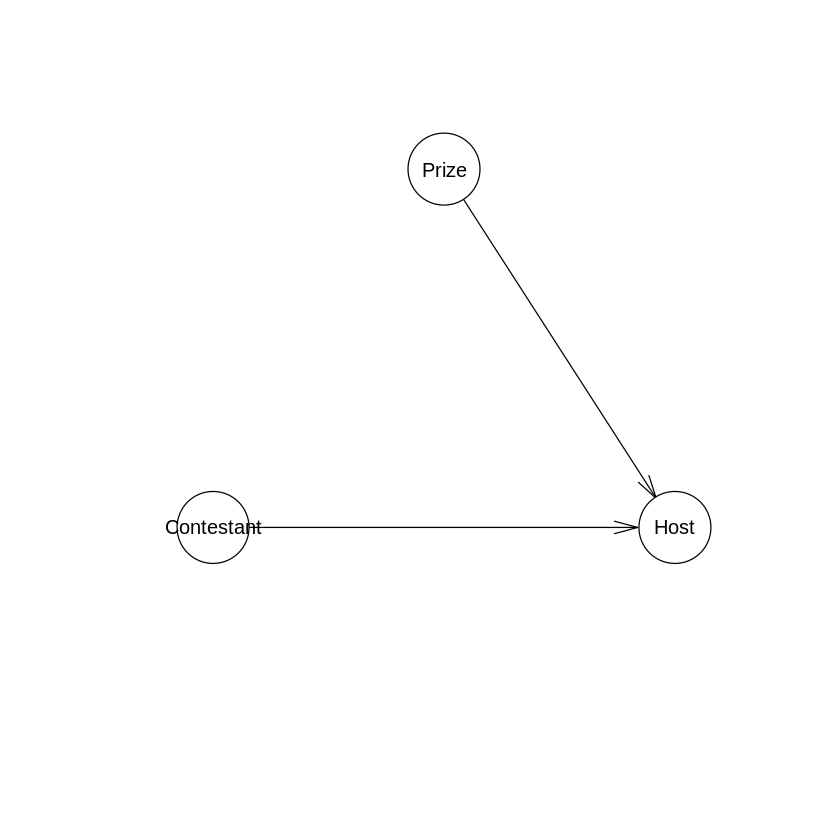

In [33]:
# 2. a)
bl.monty <- model2network("[Prize][Contestant][Host|Prize:Contestant]")
plot(bl.monty)
choice <- c("1", "2", "3")
C <- array(dimnames = list(Contestant = choice), dim = 3, c(0.333, 0.333, 0.334))
P <- array(dimnames = list(Prize = choice), dim = 3, c(0.333, 0.333, 0.334))
H <- array(dimnames = list(Host = choice, Prize = choice, Contestant = choice),
           dim = c(3, 3, 3),
           c(0, 0.5, 0.5, 0, 0, 1, 0, 1, 0,
             0, 0, 1, 0.5, 0, 0.5, 1, 0, 0,
             0, 1, 0, 1, 0, 0, 0.5, 0.5, 0))
cpts <- list(Contestant = C, Prize = P, Host = H)
bl.monty.fit = custom.fit(bl.monty, cpts)

In [62]:
# 2. b)
gr.monty <- as.grain(bl.monty.fit)
gr.monty <- compile(gr.monty)
nodes = c("Prize", "Contestant", "Host")
gr.monty.NoEvidence <- retractEvidence(gr.monty, nodes)
# i.
compare.list(querygrain(object = gr.monty.NoEvidence, nodes="Host"), querygrain(object = gr.monty, nodes="Host"))
# Brak dowodów nie wpłynął na prawdopodobieństwo wyboru Hosta.

[1] TRUE

In [64]:
# 2. c)
gr.monty.Contestant <- setEvidence(object = gr.monty, nodes = "Contestant", states = "3")
# i
querygrain(object = gr.monty, nodes="Prize", type = "joint")
querygrain(object = gr.monty.Contestant, nodes="Prize", type = "joint")
# Prawdopodobieństwo sukcesu dla bramek nie zmieniło się po dokonaniu wyboru Contestanta. 

Prize
    1     2     3 
0.333 0.333 0.334

Prize
    1     2     3 
0.333 0.333 0.334

In [65]:
# ii
querygrain(object = gr.monty, nodes="Host", type = "joint")
querygrain(object = gr.monty.Contestant, nodes="Host", type = "joint")
# Prawdopodobieństwo wyboru Hosta dla pierwszej i drugiej bramki wzrosło, dla trzeciej zmalało.

Host
        1         2         3 
0.3336665 0.3336665 0.3326670

Host
  1   2   3 
0.5 0.5 0.0

In [69]:
# 2. d)
gr.monty.ContestantHost <- setEvidence(object=gr.monty, nodes = c("Contestant", "Host"), states = c("1", "3"))
# i
querygrain(object = gr.monty.ContestantHost, nodes="Prize", type = "joint")
which.max(querygrain(object = gr.monty.ContestantHost, nodes="Prize", type = "joint"))
# Bramka nr 2 ma największe prawdopodobieństwo wygranej.

Prize
        1         2         3 
0.3333333 0.6666667 0.0000000

2 
2